In [1]:
import csv
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [6]:

df = pd.read_csv('tilFeb.csv')

# List of columns to drop
columns_to_drop = ['User_Id', 'Order_Id', 'Transaction_Id', 'Primary_Asset', 
                   'Realized_Amount_For_Primary_Asset', 'Realized_Amount_For_Primary_Asset_In_USD_Value', 'Payment_Method', 'Withdrawal_Method', 'Additional_Note', 'Realized_Amount_For_Fee_Asset_In_USD_Value', 'Realized_Amount_For_Quote_Asset', 'Realized_Amount_For_Fee_Asset', 'Fee_Asset', 'Category']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

# Now 'df' contains the DataFrame without the specified columns

df.head()

,Time,Operation,Base_Asset,Realized_Amount_For_Base_Asset,Realized_Amount_For_Base_Asset_In_USD_Value,Quote_Asset,Realized_Amount_For_Quote_Asset_In_USD_Value
0,2023-06-01 17:32:14,Buy,BTC,0.00114,30.574769,USDT,30.754898
1,2023-06-01 17:32:14,Buy,BTC,0.00015,4.022996,USDT,4.046708
2,2023-06-01 17:50:00,Sell,BTC,0.00120,32.183968,USDT,32.391607
3,2023-06-01 17:50:00,Sell,BTC,0.00009,2.413798,USDT,2.429371
4,2023-06-02 05:41:46,Sell,BTC,0.00184,50.139244,USDT,50.043622


In [66]:
#BTC

import pandas as pd

# Load CSV file into DataFrame
df = pd.read_csv('tilFeb.csv')

# List of columns to drop
columns_to_drop = ['User_Id', 'Order_Id', 'Transaction_Id', 'Primary_Asset', 
                   'Realized_Amount_For_Primary_Asset', 'Realized_Amount_For_Primary_Asset_In_USD_Value', 'Payment_Method', 'Withdrawal_Method', 'Additional_Note', 'Realized_Amount_For_Fee_Asset_In_USD_Value', 'Realized_Amount_For_Quote_Asset', 'Realized_Amount_For_Fee_Asset', 'Fee_Asset', 'Category']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

# Convert 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'])

# Sort DataFrame by 'Time' for better analysis
df = df.sort_values(by='Time')

# Calculate total trade
total_trades = df.shape[0]

# Calculate average trade size
average_trade_size = df['Realized_Amount_For_Base_Asset'].mean()

# Calculate total buys and sells
total_buys = df[df['Operation'] == 'Buy']['Realized_Amount_For_Base_Asset'].sum()
total_sells = df[df['Operation'] == 'Sell']['Realized_Amount_For_Base_Asset'].sum()

total_buys_ave_btc = df[df['Operation'] == 'Buy']['Realized_Amount_For_Base_Asset'].mean()
total_sells_ave_btc = df[df['Operation'] == 'Sell']['Realized_Amount_For_Base_Asset'].mean()

# Calculate total sell over buy
total_sell_over_buy = df[df['Operation'] == 'Sell'].shape[0] - df[df['Operation'] == 'Buy'].shape[0]

# Print the results
print(f'Total Sells Ave: {total_sells_ave_btc}, Total Buys Ave: {total_buys_ave_btc}')
print(f'Total Trades: {total_trades}')
print(f'Average Trade Size: {average_trade_size}')
print(f'Toal Buys: {total_buys}, Total Sells: {total_sells}, Total Sell Over Buy: {total_sell_over_buy}')


Total Sells Ave: 0.00048419248003117083, Total Buys Ave: 0.0004937625552430694
Total Trades: 10111
Average Trade Size: 0.0004889041637820196
Toal Buys: 2.45795, Total Sells: 2.48536, Total Sell Over Buy: 155


In [65]:
#USDT

import pandas as pd

# Load CSV file into DataFrame
df = pd.read_csv('tilFeb.csv')

# List of columns to drop
columns_to_drop = ['User_Id', 'Order_Id', 'Transaction_Id', 'Primary_Asset', 
                   'Realized_Amount_For_Primary_Asset', 'Realized_Amount_For_Primary_Asset_In_USD_Value', 'Payment_Method', 'Withdrawal_Method', 'Additional_Note', 'Realized_Amount_For_Fee_Asset_In_USD_Value', 'Realized_Amount_For_Quote_Asset', 'Realized_Amount_For_Fee_Asset', 'Fee_Asset', 'Category']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

# Convert 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'])

# Sort DataFrame by 'Time' for better analysis
df = df.sort_values(by='Time')

# Calculate total trade
total_trades = df.shape[0]

# Calculate average trade size
average_trade_size = df['Realized_Amount_For_Base_Asset_In_USD_Value'].mean()

# Calculate total buys and sells
total_buys = df[df['Operation'] == 'Buy']['Realized_Amount_For_Base_Asset_In_USD_Value'].sum()
total_sells = df[df['Operation'] == 'Sell']['Realized_Amount_For_Base_Asset_In_USD_Value'].sum()

total_buys_ave = df[df['Operation'] == 'Buy']['Realized_Amount_For_Base_Asset_In_USD_Value'].mean()
total_sells_ave = df[df['Operation'] == 'Sell']['Realized_Amount_For_Base_Asset_In_USD_Value'].mean()

# Calculate total sell over buy
total_sell_over_buy = df[df['Operation'] == 'Sell'].shape[0] - df[df['Operation'] == 'Buy'].shape[0]

# Print the results
print(f'Total Sells Ave: {total_sells_ave}, Total Buys Ave: {total_buys_ave}')
print(f'Total Trades: {total_trades}')
print(f'Average Trade Size: {average_trade_size}')
print(f'Toal Buys: {total_buys}, Total Sells: {total_sells}, Total Sell Over Buy Difference: {total_sell_over_buy}')


Total Sells Ave: 19.99441448469511, Total Buys Ave: 20.26545763439132
Total Trades: 10111
Average Trade Size: 20.127858535648304
Toal Buys: 100881.448104, Total Sells: 102631.32954994, Total Sell Over Buy Difference: 155


In [57]:
import pandas as pd

# Load CSV file into DataFrame
df = pd.read_csv('tilFeb.csv')

# List of columns to drop
columns_to_drop = ['User_Id', 'Order_Id', 'Transaction_Id', 'Primary_Asset', 
                   'Realized_Amount_For_Primary_Asset', 'Realized_Amount_For_Primary_Asset_In_USD_Value', 'Payment_Method', 'Withdrawal_Method', 'Additional_Note', 'Realized_Amount_For_Fee_Asset_In_USD_Value', 'Realized_Amount_For_Quote_Asset', 'Realized_Amount_For_Fee_Asset', 'Fee_Asset', 'Category']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

# Convert 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'])

# Sort DataFrame by 'Time' for better analysis
df = df.sort_values(by='Time')

# Calculate the amount gained
amount_gained = df[df['Operation'] == 'Sell']['Realized_Amount_For_Base_Asset'].sum() - df[df['Operation'] == 'Buy']['Realized_Amount_For_Base_Asset'].sum()

# Print the result
print(f'Amount Gained: {amount_gained}')


Amount Gained: 0.027410000000000156


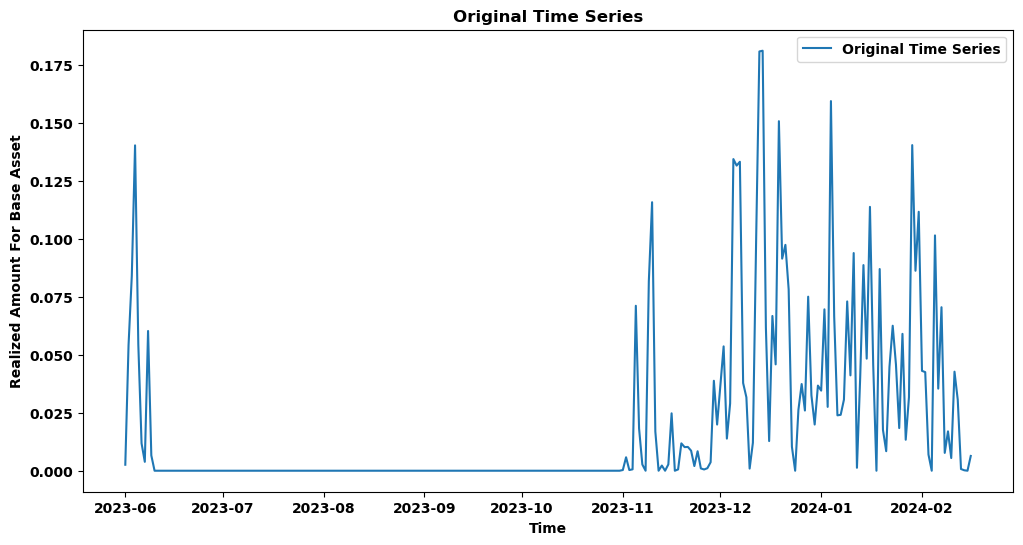

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load CSV file into DataFrame
df = pd.read_csv('tilFeb.csv')

# List of columns to drop
columns_to_drop = ['User_Id', 'Order_Id', 'Transaction_Id', 'Primary_Asset', 
                   'Realized_Amount_For_Primary_Asset', 'Realized_Amount_For_Primary_Asset_In_USD_Value', 'Payment_Method', 'Withdrawal_Method', 'Additional_Note', 'Realized_Amount_For_Fee_Asset_In_USD_Value', 'Realized_Amount_For_Quote_Asset', 'Realized_Amount_For_Fee_Asset', 'Fee_Asset', 'Category']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

# Convert 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'])

# Set 'Time' column as the index
df = df.set_index('Time')

# Resample data to daily frequency, you can change it based on your data
df_resampled = df.resample('D').sum()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['Realized_Amount_For_Base_Asset'], label='Original Time Series')
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Realized Amount For Base Asset')
plt.legend()
plt.show()

# Decompose the time series into trend, seasonal, and residual components
result = seasonal_decompose(df_resampled['Realized_Amount_For_Base_Asset'], model='additive', period=1)  # Change period based on your data frequency



In [71]:
import pandas as pd
from datetime import timedelta

# Load CSV file into DataFrame
df = pd.read_csv('tilFeb.csv')

# List of columns to drop
columns_to_drop = ['User_Id', 'Order_Id', 'Transaction_Id', 'Primary_Asset', 
                   'Realized_Amount_For_Primary_Asset', 'Realized_Amount_For_Primary_Asset_In_USD_Value', 'Payment_Method', 'Withdrawal_Method', 'Additional_Note', 'Realized_Amount_For_Fee_Asset_In_USD_Value', 'Realized_Amount_For_Quote_Asset', 'Realized_Amount_For_Fee_Asset', 'Fee_Asset', 'Category']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

# Convert 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'])

# Sort DataFrame by 'Time'
df = df.sort_values(by='Time')

# Identify rows where 'Operation' is 'Buy' or 'Sell'
buy_sell_rows = df[df['Operation'].isin(['Buy', 'Sell'])]

# Calculate the time difference between consecutive rows
buy_sell_rows['Time_Difference'] = buy_sell_rows['Time'].diff()

# Filter only the rows where 'Operation' is 'Buy'
buy_rows = buy_sell_rows[buy_sell_rows['Operation'] == 'Buy']

# Calculate the average time difference for buys
average_time_between_buys = buy_rows['Time_Difference'].mean()

print(f'Average Time Between Buy and Sell: {average_time_between_buys}')


Average Time Between Buy and Sell: 0 days 01:02:49.184247538


In [69]:
import pandas as pd
import hvplot.pandas as hv
from bokeh.models import HoverTool
from bokeh.palettes import Greens, Reds
import yfinance as yf

# Load CSV file into DataFrame
df = pd.read_csv('tilFeb.csv')

# List of columns to drop
columns_to_drop = ['User_Id', 'Order_Id', 'Transaction_Id', 'Primary_Asset', 
                   'Realized_Amount_For_Primary_Asset', 'Realized_Amount_For_Primary_Asset_In_USD_Value', 'Payment_Method', 'Withdrawal_Method', 'Additional_Note', 'Realized_Amount_For_Fee_Asset_In_USD_Value', 'Realized_Amount_For_Quote_Asset', 'Realized_Amount_For_Fee_Asset', 'Fee_Asset', 'Category']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

# Convert 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'])

# Create separate DataFrames for Buys and Sells
df_buys = df[df['Operation'] == 'Buy']
df_sells = df[df['Operation'] == 'Sell']

# Fetch Bitcoin historical data using yfinance
btc_data = yf.download('BTC-USD', start='2023-11-15', end='2024-02-15')

# Convert 'Date' index to datetime type
btc_data.index = pd.to_datetime(btc_data.index)

# Scatter Plot for Buys (Green) and Sells (Red) on the same plot
scatter_plot = df.hvplot.scatter(
    x='Time', y='Realized_Amount_For_Base_Asset', color=df['Operation'].map({'Buy': Greens[3][1], 'Sell': Reds[3][1]}), size=30,
    width=1200, height=600, padding=0.1,
    title='Futuristic Scatter Plot with BTC Overlay',
    xlabel='Time', ylabel='Realized Amount For Base Asset',
    hover_cols=['Realized_Amount_For_Base_Asset']
).opts(tools=[HoverTool(tooltips=[('Value', '@Realized_Amount_For_Base_Asset')])])


# Display Plots
scatter_plot



[*********************100%***********************]  1 of 1 completed


:Scatter   [Time]   (Realized_Amount_For_Base_Asset,_color)